### Rizky Ramdhani Koswara
### 11122300
### 4KA25

## **1) Importing Python Packages for GAN**


In [ ]:
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Dropout

# Import LeakyReLU directly from keras.layers
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
!mkdir generated_images

### **Penjelasan Logika & Output Bagian 1: Impor Library**

**Logika Kode:**
Blok ini berfungsi untuk mengimpor semua "alat" atau *library* Python yang kita butuhkan untuk membangun dan melatih GAN:
* `keras.datasets`: Untuk memuat dataset **CIFAR-10** (gambar berwarna kecil) dan MNIST (meskipun MNIST tidak digunakan di sini).
* `keras.models`, `keras.layers`: Komponen utama dari Keras untuk membangun arsitektur jaringan saraf (Sequential, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape, LeakyReLU, Dropout). `Conv2D` dan `Conv2DTranspose` penting karena kita bekerja dengan gambar.
* `tensorflow.keras.optimizers`: Mengimpor optimizer `Adam`, yang akan mengatur bagaimana model belajar selama pelatihan.
* `numpy`: Library standar untuk operasi numerik, terutama untuk mengelola data gambar dalam bentuk array.
* `!mkdir generated_images`: Ini adalah perintah *shell* (bukan Python murni) untuk membuat direktori (folder) baru bernama `generated_images`. Folder ini akan digunakan untuk menyimpan gambar-gambar yang dihasilkan oleh Generator selama pelatihan.

**Output/Efek:**
* Semua *library* yang diperlukan dimuat ke dalam memori, siap digunakan.
* Sebuah folder bernama `generated_images` dibuat di direktori kerja saat ini. Jika folder tersebut sudah ada, perintah `mkdir` mungkin akan menampilkan pesan error (biasanya tidak berbahaya dan bisa diabaikan).

## **2) Parameters for Neural Networks & Data**

In [ ]:
img_width = 32
img_height = 32
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

### **Penjelasan Logika & Output Bagian 2: Parameter**

**Logika Kode:**
Blok ini mendefinisikan variabel-variabel penting (parameter) yang akan mengontrol struktur model dan proses pelatihan:
* `img_width`, `img_height`, `channels`: Menentukan dimensi gambar target. Untuk dataset CIFAR-10, ukurannya adalah **32x32 piksel** dengan **3 channel warna** (Merah, Hijau, Biru - RGB).
* `img_shape`: Menggabungkan dimensi di atas menjadi satu tuple `(32, 32, 3)` yang akan digunakan untuk mendefinisikan bentuk input/output layer gambar.
* `latent_dim`: Ukuran **ruang laten** (input acak untuk Generator), diatur ke **100**. Ini berarti Generator akan membuat gambar berdasarkan 100 angka acak sebagai "inspirasi".
* `adam`: Menginisialisasi optimizer **Adam** dengan *learning rate* (laju belajar) tertentu (`0.0002`). *Learning rate* mengontrol seberapa besar penyesuaian yang dilakukan pada model di setiap langkah pelatihan.

**Output/Efek:**
* Variabel-variabel ini disimpan dalam memori. Nilai-nilai ini akan digunakan saat membangun arsitektur Generator dan Diskriminator, serta saat mengompilasi model. Tidak ada output visual di sini, tetapi variabel siap pakai.

## **3) Building Generator**





In [ ]:
def build_generator():
    model = Sequential()

    # Create first layer, to receive the input
    model.add(Dense(256 * 4 * 4, input_dim = latent_dim))
    # 256 * 8 * 8; for upscaling the layers,
    # initial shape to construct into final shape

    # Create default activation function
    model.add(LeakyReLU(alpha = 0.2))

    # Create reshape layer
    model.add(Reshape((4, 4,256)))
    # 8,8,256 ; reffers to first layer

    # Adding more layers for neurons and better result
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    model.add(Conv2DTranspose(128, (4,4), strides = (2,2), padding = 'same'))
    model.add(LeakyReLU(alpha= 0.2))
    # (4,4) >> filter size
    # strides = (2,2) >> Convolutional layers, that how NN understand images

    # Create Final output layer and forming image shape
    # the shape (3, (3,3)) reffers to image shape :
    #    >>>  img_shape = (img_width, img_height, channels)
    model.add(Conv2D(3, (3,3), activation= 'tanh', padding = 'same'))

    #
    model.summary()
    return model

generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

### **Penjelasan Logika & Output Bagian 3: Membangun Generator**

**Logika Kode:**
Blok ini mendefinisikan arsitektur **Generator** menggunakan model `Sequential` Keras. Tugas Generator adalah mengubah input acak (`latent_dim`=100) menjadi gambar berukuran 32x32x3 yang mirip gambar CIFAR-10. Proses ini disebut *upsampling*.
1.  **Input & Proyeksi Awal**: Layer `Dense` pertama menerima input 100 dimensi dan memproyeksikannya ke ruang yang jauh lebih besar (`256 * 4 * 4 = 4096` neuron). Ini adalah langkah awal untuk menyiapkan data sebelum diubah menjadi format gambar.
2.  **Aktivasi & Reshape**: Fungsi aktivasi `LeakyReLU` digunakan (membantu aliran gradien saat training). Kemudian, `Reshape` mengubah output Dense 1D menjadi *feature map* kecil 3D (`4x4x256`). Ini adalah "kanvas" awal Generator.
3.  **Upsampling (Conv2DTranspose)**: Beberapa layer `Conv2DTranspose` digunakan secara berurutan. Layer ini melakukan kebalikan dari konvolusi biasa; ia memperbesar dimensi spasial (*feature map*) sambil mengurangi/menyesuaikan jumlah channel/filter.
    * `4x4x256` -> `8x8x128`
    * `8x8x128` -> `16x16x128`
    * `16x16x128` -> `32x32x128`
    * `LeakyReLU` digunakan setelah setiap *upsampling*. `strides=(2,2)` menggandakan tinggi dan lebar, `padding='same'` memastikan ukurannya pas.
4.  **Output Layer (Conv2D)**: Layer `Conv2D` terakhir menghasilkan output akhir dengan 3 channel (sesuai `img_shape`) menggunakan filter 3x3. Fungsi aktivasi **`tanh`** digunakan, menghasilkan nilai piksel dalam rentang **[-1, 1]**.
5.  **Ringkasan**: `model.summary()` mencetak detail arsitektur ke layar.

**Output/Efek:**
* Sebuah model Keras (`Sequential`) yang merepresentasikan Generator dibuat dan disimpan dalam variabel `generator`.
* Output sel menunjukkan `model.summary()`: daftar layer, bentuk output setiap layer, dan jumlah parameter (bobot) yang dapat dilatih. Ini memberikan gambaran detail arsitektur yang baru saja didefinisikan. Peringatan (*warnings*) mungkin muncul terkait argumen `input_dim` atau `alpha` yang usang, tapi model tetap dibuat.

## **4) Building Discriminator**

In [ ]:
def build_discriminator():
    model = Sequential()

    # Create input layer and filter and stride layer. That makes NN understand image
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = img_shape))

    # Adding activation function
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(256, (3,3), padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Flatten())

    model.add(Dropout(0.4))

    # Create output layer
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         262,145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,545 (2.98 MB)

 Trainable params: 780,545 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

### **Penjelasan Logika & Output Bagian 4: Membangun Diskriminator**

**Logika Kode:**
Blok ini mendefinisikan arsitektur **Diskriminator**, juga menggunakan model `Sequential`. Tugas Diskriminator adalah menerima gambar (asli atau palsu) dan mengklasifikasikannya sebagai "asli" (output dekat 1) atau "palsu" (output dekat 0). Ini pada dasarnya adalah **CNN (Convolutional Neural Network)** untuk klasifikasi biner.
1.  **Input & Feature Extraction (Conv2D)**: Beberapa layer `Conv2D` digunakan untuk memproses gambar input `(32, 32, 3)`. Layer ini berfungsi mengekstrak fitur-fitur visual dari gambar (tepi, tekstur, bentuk).
    * Jumlah filter meningkat (64 -> 128 -> 128 -> 256) untuk menangkap fitur yang semakin kompleks.
    * `padding='same'` menjaga ukuran spasial gambar tetap 32x32 di setiap layer konvolusi.
    * `LeakyReLU` digunakan sebagai fungsi aktivasi setelah setiap `Conv2D`.
2.  **Flatten**: Setelah ekstraksi fitur, layer `Flatten` mengubah *feature map* 3D terakhir menjadi vektor 1D yang panjang.
3.  **Dropout**: Layer `Dropout(0.4)` secara acak menonaktifkan 40% neuron selama pelatihan. Ini adalah teknik **regularisasi** untuk mencegah *overfitting* (model terlalu hafal data training dan tidak bisa generalisasi ke data baru).
4.  **Output Layer**: Layer `Dense` terakhir hanya memiliki **1 neuron** dengan fungsi aktivasi **`sigmoid`**. Sigmoid menghasilkan output antara 0 dan 1, yang ideal untuk merepresentasikan probabilitas keaslian gambar.
5.  **Ringkasan & Kompilasi**: `model.summary()` mencetak arsitektur. Kemudian, `discriminator.compile(...)` menyiapkan Diskriminator untuk pelatihan mandiri.
    * `loss='binary_crossentropy'`: Fungsi kerugian yang cocok untuk klasifikasi biner (asli vs palsu).
    * `optimizer=adam`: Menggunakan optimizer Adam yang sudah didefinisikan.
    * `metrics=['accuracy']`: Meminta model untuk melaporkan akurasi selama pelatihan.

**Output/Efek:**
* Model Keras untuk Diskriminator dibuat dan disimpan dalam variabel `discriminator`.
* Model ini dikompilasi, artinya siap untuk dilatih menggunakan metode `train_on_batch`.
* Output sel menunjukkan `model.summary()` yang merinci arsitektur Diskriminator. Peringatan tentang `input_shape` mungkin muncul.

## **5) Connecting Neural Networks to build GAN**

In [ ]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

In [ ]:
GAN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │         780,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,246,660 (8.57 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 780,545 (2.98 MB)

### **Penjelasan Logika & Output Bagian 5: Menghubungkan Jaringan (Membangun GAN)**

**Logika Kode:**
Blok ini menggabungkan Generator dan Diskriminator menjadi satu model besar, yaitu model **GAN**, yang tujuannya adalah untuk **melatih Generator**.
1.  **Inisialisasi Model GAN**: Sebuah model `Sequential` baru dibuat dengan nama `GAN`.
2.  **Membekukan Diskriminator**: `discriminator.trainable = False` adalah langkah **kunci**. Ini memastikan bahwa ketika kita melatih model `GAN`, hanya bobot (parameter) **Generator** yang akan diperbarui. Bobot Diskriminator tetap tidak berubah selama fase pelatihan Generator ini.
3.  **Menyusun Model**: `GAN.add(generator)` menambahkan Generator sebagai layer pertama, dan `GAN.add(discriminator)` menambahkan Diskriminator (yang sudah dibekukan) sebagai layer kedua. Alur datanya menjadi: *Input Acak -> Generator -> Gambar Palsu -> Diskriminator -> Output Probabilitas*.
4.  **Kompilasi Model GAN**: `GAN.compile(...)` menyiapkan model gabungan ini.
    * `loss='binary_crossentropy'`: Sama seperti Diskriminator, karena output akhirnya berasal dari Diskriminator.
    * `optimizer=adam`: Menggunakan optimizer yang sama. Ketika `GAN.train_on_batch` dipanggil nanti, optimizer ini akan menghitung gradien berdasarkan *loss*, tetapi *hanya* menerapkan pembaruan pada bobot Generator (karena Diskriminator sudah dibekukan).
5.  **Ringkasan GAN**: `GAN.summary()` (di sel berikutnya) akan menunjukkan struktur gabungan ini.

**Output/Efek:**
* Model Keras `GAN` dibuat, menggabungkan `generator` dan `discriminator`.
* Model `GAN` dikompilasi.
* Output sel berikutnya (`GAN.summary()`) menunjukkan dua "layer" utama (yaitu, model `sequential` (Generator) dan `sequential_1` (Diskriminator)). Yang penting, ia juga menunjukkan jumlah *Trainable params* (parameter yang bisa dilatih) yang sama dengan jumlah parameter Generator, dan *Non-trainable params* yang sama dengan jumlah parameter Diskriminator, memvalidasi bahwa Diskriminator memang telah dibekukan dalam konteks model `GAN` ini.

## **6) Outputting Images**


In [ ]:
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001
    # print("%.8f" % save_name)

    # Rescale images 0 - 1
    # gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = (gen_imgs + 1) / 2.0
    # gen_imgs = gen_imgs * 255

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

### **Penjelasan Logika & Output Bagian 6: Fungsi Menyimpan Gambar**

**Logika Kode:**
Blok ini mendefinisikan sebuah fungsi bernama `save_imgs(epoch)` yang akan dipanggil secara berkala selama pelatihan untuk memvisualisasikan hasil Generator.
1.  **Parameter**: Fungsi menerima nomor `epoch` saat ini sebagai input (meskipun tidak digunakan dalam nama file di kode ini).
2.  **Grid & Noise**: Menentukan ukuran grid untuk gambar (5x5 = 25 gambar). Membuat *noise* acak (`np.random.normal`) sebanyak 25 sampel, masing-masing berukuran `latent_dim` (100).
3.  **Generate Images**: Memanggil `generator.predict(noise)` untuk menghasilkan 25 gambar palsu dari *noise* acak tadi.
4.  **Filename**: Menggunakan variabel global `save_name` dan menambahkan nilai kecil (0.00000001) setiap kali fungsi dipanggil untuk membuat nama file yang unik secara berurutan (misal: `0.00000001.png`, `0.00000002.png`, dst.).
5.  **Rescale Images**: Gambar yang dihasilkan Generator memiliki nilai piksel antara -1 dan 1 (karena aktivasi `tanh`). Baris `gen_imgs = (gen_imgs + 1) / 2.0` mengubah skala nilai ini menjadi antara **0 dan 1**, yang merupakan rentang yang dibutuhkan oleh `matplotlib.pyplot.imshow` untuk menampilkan gambar dengan benar.
6.  **Plotting**: Membuat grid plot menggunakan `plt.subplots`. Kemudian, melakukan *loop* untuk menampilkan setiap gambar (`gen_imgs[cnt]`) pada subplot yang sesuai (`axs[i,j]`). Sumbu dinonaktifkan (`axis('off')`).
7.  **Saving**: Menyimpan figure plot (`fig`) sebagai file PNG ke dalam folder `generated_images` dengan nama file yang sudah dibuat.
8.  **Close Plot**: `plt.close()` menutup figure agar tidak ditampilkan langsung di output notebook dan menghemat memori.

**Output/Efek:**
* Blok ini hanya **mendefinisikan** fungsi `save_imgs`. Tidak ada output visual saat sel ini dijalankan. Fungsi ini baru akan dieksekusi ketika dipanggil dari dalam *loop* pelatihan di bagian 7. Ketika dipanggil, efeknya adalah pembuatan file gambar PNG di folder `generated_images`.

## **7) Training GAN**

In [ ]:
def train(epochs, batch_size = 32, save_interval = 500, data_limit=1000):
    (X_train, _), (_, _) = cifar10.load_data()

    # Rescaling the data
    X_train = X_train / 127.5 -1.

    # Jika data_limit diberikan, batasi jumlah data yang digunakan
    if data_limit is not None:
        X_train = X_train[:data_limit]

    bat_per_epo = int(X_train.shape[0] / batch_size)

    # Create Y label for NN
    valid = np.ones((batch_size,1))
    fakes = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        for j in range(bat_per_epo):
            # Get Random Batch
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Generate Fake Images
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_imgs = generator.predict(noise)

            # Train Discriminator
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, latent_dim))

            # Inverse Y label
            g_loss = GAN.train_on_batch(noise, valid)

            print("******* %d [D loss: %f, acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss[0]))
        save_imgs(epoch)

# Batas data menjadi 1000 gambar
train(epochs=10, batch_size=32, save_interval=500, data_limit=1000) #original code: train(epochs=1000, batch_size=64, save_interval=200)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


******* 0 [D loss: 0.710809, acc: 29.69%] [G loss: 0.704792]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


******* 0 [D loss: 0.703522, acc: 36.20%] [G loss: 0.702097]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
******* 0 [D loss: 0.704500, acc: 26.93%] [G loss: 0.703581]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
******* 0 [D loss: 0.704324, acc: 21.34%] [G loss: 0.703724]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
******* 0 [D loss: 0.704880, acc: 17.48%] [G loss: 0.704426]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
******* 0 [D loss: 0.705070, acc: 15.52%] [G loss: 0.704744]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
******* 0 [D loss: 0.705218, acc: 14.14%] [G loss: 0.704997]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
******* 0 [D loss: 0.704971, acc: 13.52%] [G loss: 0.704849]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
******* 0 [D loss: 0.705620, acc: 12.33%] [G loss: 0.705558]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
******* 0 [D loss: 0.706210, acc: 11.39%] [G loss: 0.706247]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
******* 0 [D loss: 0.706940, acc: 11.05%] [G loss: 0.707049]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [ ]:
noise = np.random.normal(0, 1, (1,latent_dim))
gen_imgs = generator.predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


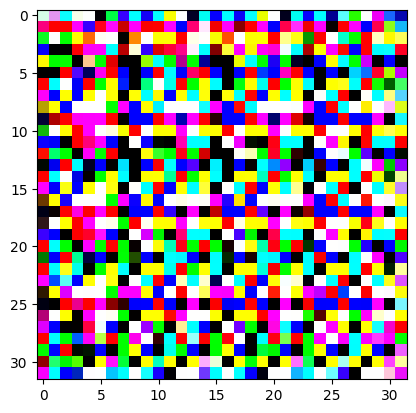

In [ ]:
gen_imgs = (gen_imgs + 1) / 2.0
plt.imshow(gen_imgs[0])

### **Penjelasan Logika & Output Bagian 7: Pelatihan GAN**

**Logika Kode:**
Ini adalah inti dari program, di mana proses pelatihan GAN (Generator vs Diskriminator) terjadi. Fungsi `train` didefinisikan dan kemudian dipanggil.
1.  **Definisi `train`**:
    * **Parameter**: Menerima jumlah `epochs` (berapa kali iterasi seluruh dataset), `batch_size` (jumlah gambar per langkah update), `save_interval` (frekuensi menyimpan gambar, meskipun tidak digunakan di pemanggilan akhir), dan `data_limit` (opsional, untuk membatasi data training).
    * **Load Data**: Memuat dataset CIFAR-10 menggunakan `cifar10.load_data()`. Hanya data gambar (`X_train`) yang diambil, labelnya diabaikan (`_`).
    * **Rescale Data**: Gambar asli (nilai piksel 0-255) diubah skalanya menjadi **[-1, 1]** agar cocok dengan rentang output Generator (`tanh`).
    * **Limit Data**: Jika `data_limit` diberikan (dalam pemanggilan ini 1000), dataset `X_train` dipotong hanya mengambil 1000 gambar pertama. Ini **mempercepat pelatihan** secara signifikan, cocok untuk demonstrasi atau pengujian cepat, tetapi hasilnya mungkin tidak sebagus melatih dengan data penuh.
    * **Batches per Epoch**: Menghitung berapa banyak batch yang ada dalam satu epoch berdasarkan data yang (mungkin) sudah dibatasi.
    * **Labels**: Membuat array target: `valid` (berisi angka 1) dan `fakes` (berisi angka 0) sesuai ukuran `batch_size`.
    * **Training Loop**:
        * **Outer Loop (`epoch`)**: Berjalan sebanyak `epochs` kali.
        * **Inner Loop (`j` / batch)**: Berjalan sebanyak `bat_per_epo` kali.
            * **Langkah 1: Latih Diskriminator**
                * Ambil satu *batch* gambar **asli** (`imgs`) secara acak dari `X_train`.
                * Buat satu *batch* gambar **palsu** (`gen_imgs`) menggunakan Generator dari *noise* acak.
                * Latih Diskriminator dua kali dalam satu langkah:
                    * `discriminator.train_on_batch(imgs, valid)`: Mengajari Diskriminator mengenali gambar asli sebagai "valid" (target 1).
                    * `discriminator.train_on_batch(gen_imgs, fakes)`: Mengajari Diskriminator mengenali gambar palsu sebagai "fake" (target 0).
                * Hitung rata-rata *loss* dan *accuracy* Diskriminator (`d_loss`).
            * **Langkah 2: Latih Generator**
                * Buat *batch* **noise** acak baru.
                * Latih model **`GAN`** gabungan (`GAN.train_on_batch(noise, valid)`). Di sini kita memberikan *noise* sebagai input dan **label `valid` (1)** sebagai target. Tujuannya adalah untuk "menipu" Diskriminator agar mengira gambar palsu yang dihasilkan dari *noise* itu adalah asli. Karena Diskriminator dibekukan di dalam model `GAN`, *loss* yang dihitung hanya digunakan untuk memperbarui **bobot Generator**.
                * Simpan *loss* Generator (`g_loss`).
            * **Cetak Progres**: Menampilkan *loss* dan *accuracy* Diskriminator serta *loss* Generator untuk memantau kemajuan pelatihan.
        * **Simpan Gambar**: Panggil `save_imgs(epoch)` **setelah setiap epoch selesai** (berdasarkan kode pemanggilan `train` yang dimodifikasi).

2.  **Pemanggilan `train`**: `train(epochs=10, batch_size=32, data_limit=1000)` memulai proses pelatihan dengan parameter yang ditentukan: 10 epoch, batch size 32, menggunakan 1000 gambar pertama dari CIFAR-10.

**Output/Efek:**
* Dataset CIFAR-10 diunduh jika belum ada (output menunjukkan proses unduh).
* Loop pelatihan berjalan. Untuk setiap *batch* di setiap *epoch*, baris `******* epoch [D loss: ..., acc: ...] [G loss: ...]` dicetak, menunjukkan nilai *loss* dan akurasi saat itu.
* Peringatan (*Warning*) tentang `tf.function retracing` mungkin muncul, ini terkait optimasi internal TensorFlow dan seringkali bisa diabaikan dalam konteks ini.
* Peringatan tentang *model does not have trainable weights* saat memprediksi mungkin muncul jika generator belum dilatih sama sekali di awal, ini normal.
* Di akhir setiap *epoch* (total 10 kali), fungsi `save_imgs` dipanggil. Ini akan menghasilkan output `predict` dari Generator dan membuat file `0.0000000X.png` di folder `generated_images`.
* Setelah 10 epoch, pelatihan selesai. Bobot Generator dan Diskriminator telah diperbarui berdasarkan proses pelatihan. Karena jumlah epoch dan data sangat terbatas, gambar yang dihasilkan kemungkinan besar masih sangat buram dan belum menyerupai objek CIFAR-10 yang jelas.

### **8) Making GIF**

In [ ]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

  if filenames:  # Check if filenames is not empty
    image = imageio.imread(filenames[-1])
    writer.append_data(image)

<ipython-input-11-46aed9259859>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-11-46aed9259859>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filenames[-1])


### **Penjelasan Logika & Output Bagian 8: Membuat GIF**

**Logika Kode:**
Blok terakhir ini bertujuan untuk membuat file **GIF animasi** dari gambar-gambar PNG yang telah disimpan di folder `generated_images` selama pelatihan.
1.  **Nama File GIF**: Menentukan nama file output sebagai `dcgan.gif`.
2.  **Cari File Gambar**: `glob.glob('generated_images/*.png')` mencari semua file yang berakhiran `.png` di dalam folder `generated_images`. Hasilnya adalah daftar nama file.
3.  **Urutkan File**: `filenames = sorted(filenames)` mengurutkan nama file. Karena nama filenya adalah angka desimal yang bertambah (misal `0.00000001.png`, `0.00000002.png`), pengurutan *string* standar akan menghasilkan urutan yang benar secara kronologis.
4.  **Buka Penulis GIF**: `imageio.get_writer(anim_file, mode='I')` membuka file GIF untuk ditulis. `mode='I'` biasanya berarti *multiple images*.
5.  **Loop & Tambahkan Gambar**: Kode melakukan *loop* melalui setiap `filename` yang sudah diurutkan:
    * `image = imageio.imread(filename)`: Membaca file PNG menjadi data gambar (array NumPy).
    * `writer.append_data(image)`: Menambahkan *frame* gambar tersebut ke file GIF.
6.  **Tambahkan Frame Terakhir (Opsional)**: Setelah *loop*, kode memeriksa apakah ada file yang ditemukan (`if filenames:`). Jika ya, ia membaca **gambar terakhir** sekali lagi dan menambahkannya ke GIF. Ini sering dilakukan agar animasi berhenti sejenak di *frame* terakhir sebelum mengulang.

**Output/Efek:**
* Sebuah file GIF animasi bernama `dcgan.gif` dibuat di direktori kerja saat ini.
* GIF ini akan menampilkan urutan gambar sampel yang dihasilkan Generator di setiap *epoch* (atau interval penyimpanan), menunjukkan evolusi kemampuan Generator selama pelatihan.
* Peringatan (*DeprecationWarning*) terkait `imageio.imread` mungkin muncul, menyarankan penggunaan versi baru `imageio.v3.imread`, tetapi kode biasanya tetap berfungsi. Jika tidak ada file PNG yang ditemukan di `generated_images`, GIF tidak akan dibuat atau akan kosong.